# Indicators of Heavy Traffic on I-94

In this project I'm going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

John Hogue made the dataset available, and you can download it from the UCI Machine Learning Repository.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows

## Data importing and overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
traffic_data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic_data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


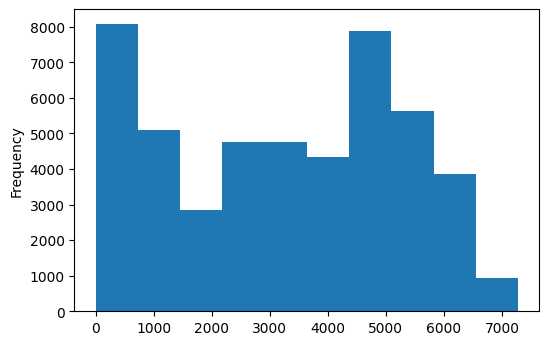

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [5]:
traffic_data['traffic_volume'].plot.hist()
plt.show()
traffic_data['traffic_volume'].describe()

We can see here, that from 2012-10-02 09:00, to 2018-09-30 23:00 every hour amount of cars varies from 0 to 7280 averaging about 3260 cars. 25% of the time, car numbers fell below 1193, this could be attributed to it being night, or weekends, or days when the road was under construction. 25% of the data fell above 4933 cars per hour. This could show rush hour numbers. To further analyse this we can compare daytime and nighttime numbers.

Going forward we will be dividing the dataset into two:
 - Daytime data: hours from 7:00 to 19:00
 - Nighttime data: hours from 19:00 to 7:00

## Analysing time impact on the traffic volumes

### Day and night

In [6]:
traffic_data['date_time'] = pd.to_datetime(traffic_data['date_time'])
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [7]:
traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [8]:
dt_data = traffic_data[(traffic_data['date_time'].dt.hour >= 7) & (traffic_data['date_time'].dt.hour < 19)]
dt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB


In [9]:
dt_data.head(13)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181
6,None,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584
7,None,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015
8,None,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791
9,None,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770


In [10]:
nt_data = traffic_data[(traffic_data['date_time'].dt.hour < 7) | (traffic_data['date_time'].dt.hour >= 19)]
nt_data.head(13)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
15,None,284.63,0.0,0.0,1,Clear,sky is clear,2012-10-03 00:00:00,506
16,None,283.47,0.0,0.0,1,Clear,sky is clear,2012-10-03 01:00:00,321
17,None,281.18,0.0,0.0,1,Clear,sky is clear,2012-10-03 02:00:00,273
18,None,281.09,0.0,0.0,1,Clear,sky is clear,2012-10-03 03:00:00,367
19,None,279.53,0.0,0.0,1,Clear,sky is clear,2012-10-03 04:00:00,814


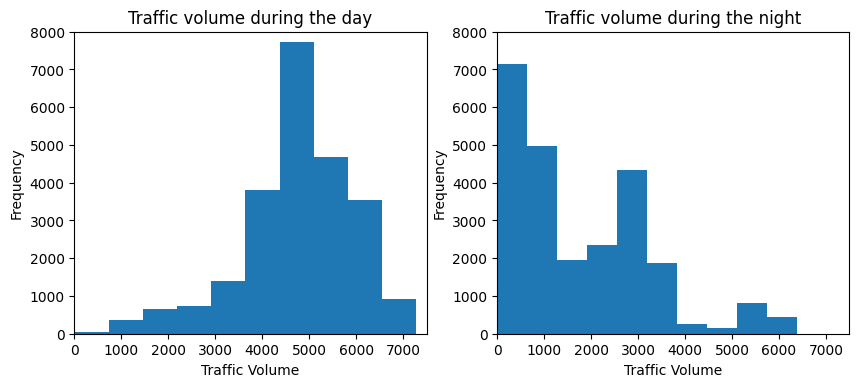

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
dt_data['traffic_volume'].plot.hist()
plt.title('Traffic volume during the day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.subplot(1, 2, 2)
nt_data['traffic_volume'].plot.hist()
plt.title('Traffic volume during the night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.show()

In [12]:
dt_data['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
nt_data['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Looking at the histograms, the daytime data leans more toward a normal distribution. The nighttime data however leans towards positive skewed distribution. Meaning there are less cars driving during the night overall, as most of our values trend to small numbers, 25% of our data is only above 2819, with an average of 1785. While the datetime data shows a pretty steady number of cars, with an average of 4762, where 25% fall below of 4252 and 25% above 5559.

Since our goal is to determine reasons for heavy traffic, and this shows that traffic during the night is pretty light, we can resume analysing the daytime data alone.

### Grouping data by other time factors
It was determined that we will analyze the datetime data, now we will look into how the time of the year (month), day of the week or the time of the day (hour) affects the traffic volumes further)

#### Analysing data by month

In [14]:
dt_data.insert(9, 'month', dt_data['date_time'].dt.month)
dt_data.info()
by_month = dt_data.groupby('month').mean()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   month                23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 2.0+ MB


In [15]:
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

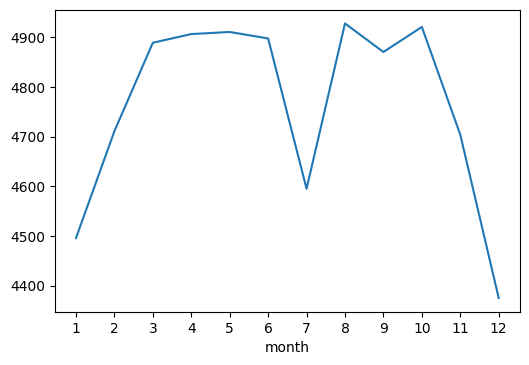

In [23]:
by_month['traffic_volume'].plot.line()
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.show()

Traffic volume averages show an interesting phenomenon, car traffic declines sharply during the months of December, which could be attributed to holiday season, and July, which is far more unusual.

Let's look at july traffic year by year.

In [24]:
dt_data.insert(10, 'year', dt_data['date_time'].dt.year)
july = dt_data[dt_data['month'] == 7]
july.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,year
7350,None,289.15,0.0,0.0,75,Clouds,broken clouds,2013-07-01 07:00:00,6783,7,2013
7351,None,291.59,0.0,0.0,1,Clear,sky is clear,2013-07-01 08:00:00,5742,7,2013
7352,None,294.15,0.0,0.0,1,Clear,sky is clear,2013-07-01 09:00:00,4764,7,2013
7353,None,295.60,0.0,0.0,1,Clear,sky is clear,2013-07-01 10:00:00,4669,7,2013
7354,None,297.15,0.0,0.0,1,Clear,sky is clear,2013-07-01 11:00:00,4863,7,2013


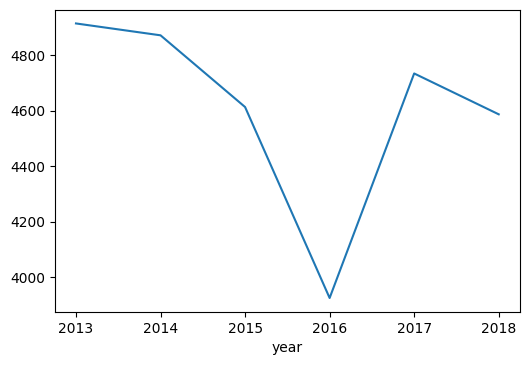

In [25]:
year_group_july = july.groupby('year').mean()
year_group_july['traffic_volume'].plot.line()
plt.show()

We can see here, that generally traffic is high in July, 2016 is an exception and the reason why the data took a sharp decline. We can tentatively make a conclusion that traffic during the warm months is high.

#### Analysing data by day of the week

In [26]:
dt_data.insert(11, 'dayofweek', dt_data['date_time'].dt.dayofweek)
by_dayofweek = dt_data.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

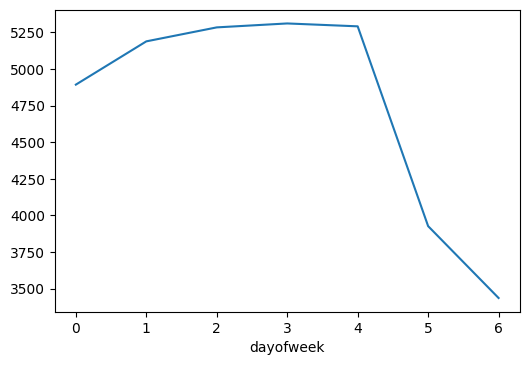

In [28]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

There is nothing unusual about day of the week data, we can see, that in general the traffic is hight during the working days (Monday - Friday) and drops off sharply during the weekend.

#### Analysing data by hour

In [29]:
dt_data.insert(12, 'hour', dt_data['date_time'].dt.hour)
by_hour = dt_data.groupby('hour').mean()
by_hour['traffic_volume']

hour
7     4740.181337
8     4587.497115
9     4385.277502
10    4184.665544
11    4465.877561
12    4718.293095
13    4714.940682
14    4931.888776
15    5240.524302
16    5663.756539
17    5310.076048
18    4263.718530
Name: traffic_volume, dtype: float64

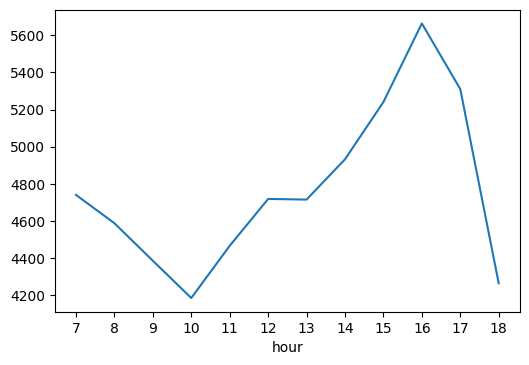

In [31]:
by_hour['traffic_volume'].plot.line()
plt.xticks([7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
plt.show()

This line graph shows the hourly data for both business days and the weekends, let's compare how the line graphs look if we separate business day data from the weekend data.

In [32]:
bd_data = dt_data[dt_data["dayofweek"] <= 4]
we_data = dt_data[dt_data["dayofweek"] > 4]

In [33]:
bd_by_hour = bd_data.groupby('hour').mean()
bd_by_hour['traffic_volume']

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [34]:
we_by_hour = we_data.groupby('hour').mean()
we_by_hour['traffic_volume']

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

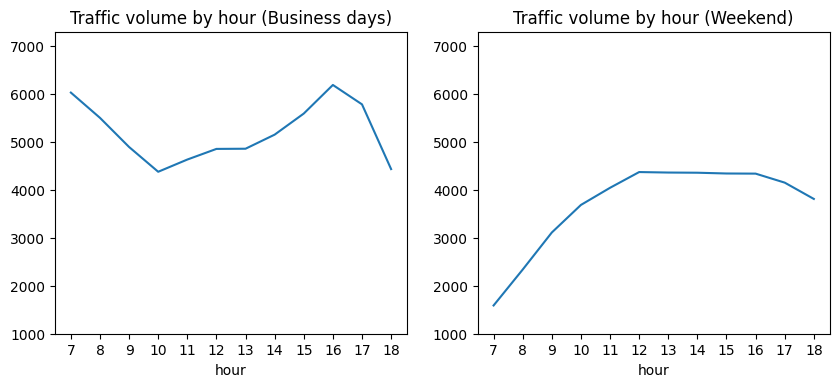

In [43]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
bd_by_hour['traffic_volume'].plot.line()
plt.xticks([7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
plt.title('Traffic volume by hour (Business days)')
plt.ylim(1000, 7300)
plt.subplot(1, 2, 2)
we_by_hour['traffic_volume'].plot.line()
plt.xticks([7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
plt.title('Traffic volume by hour (Weekend)')
plt.ylim(1000, 7300)
plt.show()

We can see here that during the business days, traffic volume starts off high and then drops off until the evening, while during the weekend the traffic volume generally starts off low and then grows during the day.

During the business days we can see, that at around 7:00 and 8:00 traffic generally stays above a 5000 volume, which mostly shows people going to work. Then it drops off until ariound 12:00 when it grows a little possibly showing people going off to have lunch. Traffic after 13:00 starts growing little by little until it reaches its peak at around 16:00, which most likely indicates people going home from work.

#### Time data conclusions
In general we can make several conclusions about time impacting the traffic volumes:
 - Warmer months (March - October), typically have a larger volume of traffic as to colder months of the year (November - February)
 - Business days show a higher volume of traffic compared to the weekends
 - Business day peak rush hours are around 7:00 and 16:00

## Analysing weather impact on the traffic volumes

In [44]:
dt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   month                23877 non-null  int64         
 10  year                 23877 non-null  int64         
 11  dayofweek            23877 non-null  int64         
 12  hour                 23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3

We have six columns (temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description) which provide us with different weather related information. Four of them (exceptions being: weather_main, weather_description) have numerical data which we can use to determine correlation with traffic volumes.

In [45]:
dt_data['traffic_volume'].corr(dt_data['temp'])

0.12831656852303905

In [46]:
dt_data['traffic_volume'].corr(dt_data['rain_1h'])

0.0036965098350734324

In [47]:
dt_data['traffic_volume'].corr(dt_data['snow_1h'])

0.001265349847175986

In [48]:
dt_data['traffic_volume'].corr(dt_data['clouds_all'])

-0.03293234866163948

Temperature column appears to have the strongest correlation with the traffic volume data. Let's plot the scatter plot for these two columns.

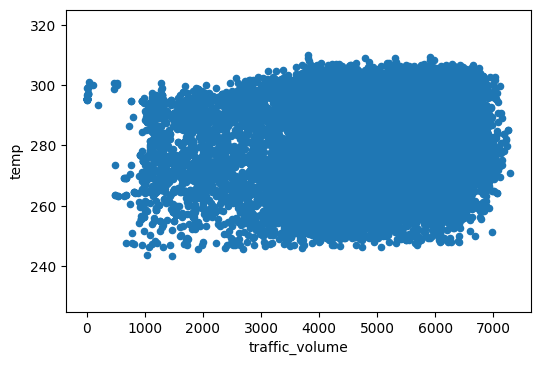

In [52]:
dt_data.plot.scatter('traffic_volume', 'temp')
plt.ylim(225, 325)
plt.show()

It looks like the temperature is not a realiable indicator for traffic volume. Let's look at the other two weather indicators: weather_main and weather_description.

In [53]:
by_wm = dt_data.groupby('weather_main').mean()
by_wd = dt_data.groupby('weather_description').mean()

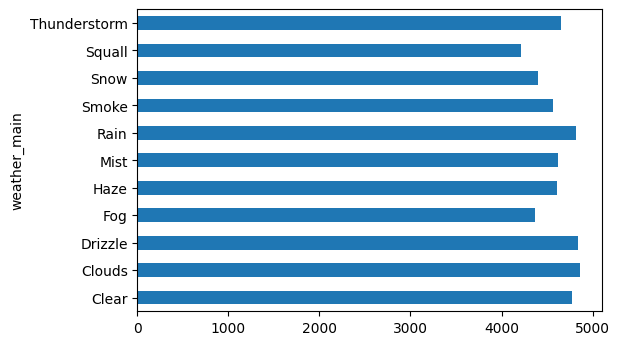

In [54]:
by_wm['traffic_volume'].plot.barh()
plt.show()

No weather condition exceeds 5000. Neither any of the weather condition show a lower volume than 4000. We cannot consider any of these to be reliable heavy traffic indicators.

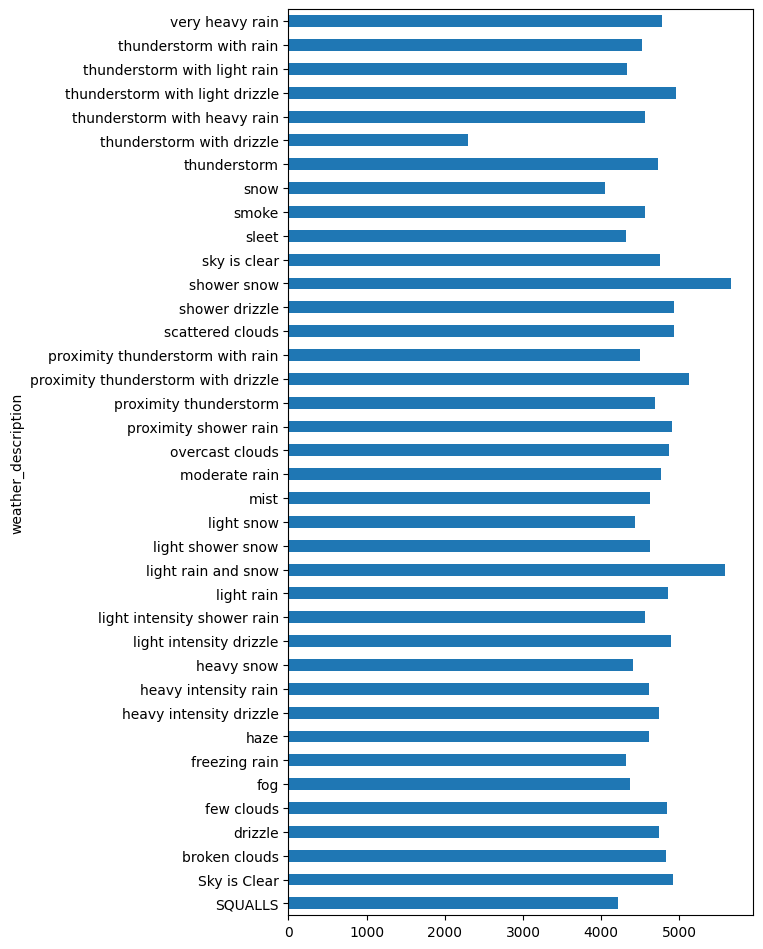

In [58]:
by_wd['traffic_volume'].plot.barh(figsize=(6,12))
plt.show()

Here we can see that "Shower Snow" and "Light rain and snow" show traffic volumes exceeding 5000. However seeing as these are relatively light conditions, I wouldn't consider them reliable traffic indicators.

## Conclusions
We can make these conclusions about the data:
 - Time indicators
    - Traffic is usually much higher during the day (7:00 to 19:00)
    - The traffic is usually much heavier during warmer months of the year (March–October) as opposed to the colder months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the peak rush hours are around 7:00 and 16:00.
 - Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle